simple gradient analysis


In [1]:
import torch
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
# Loading training data
train_dataset = datasets.MNIST(root='./data',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

# Loading test data
test_dataset = datasets.MNIST(root='./data',
                              train=False,
                              transform=transforms.ToTensor())


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 20146150.37it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 614259.68it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 5565478.20it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3565511.65it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
# Define the logistic regression model
class LogisticRegression(torch.nn.Module):
    def __init__(self, n_inputs, n_outputs):
        super().__init__()
        self.linear = torch.nn.Linear(n_inputs, n_outputs)
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred


In [9]:
# Function to train the model using simple Gradient Descent
def train_model(epochs, learning_rate):
    # Load train and test data samples into DataLoader
    train_loader = DataLoader(dataset=train_dataset, batch_size=len(train_dataset), shuffle=True)
    test_loader = DataLoader(dataset=test_dataset, batch_size=len(test_dataset), shuffle=False)

    # Instantiate the model
    n_inputs = 28 * 28  # Makes a 1D vector of 784
    n_outputs = 10
    log_regr = LogisticRegression(n_inputs, n_outputs)

    # Define the loss function
    criterion = torch.nn.CrossEntropyLoss()

    # List to store loss and accuracy values
    Loss = []
    acc = []

    # Training loop
    for epoch in range(epochs):
        # Set the model to training mode
        log_regr.train()

        for images, labels in train_loader:
            # Flatten the images from (batch_size, 1, 28, 28) to (batch_size, 784)
            images = images.view(-1, n_inputs)

            # Forward pass
            outputs = log_regr(images)
            loss = criterion(outputs, labels)

            # Backward pass and manually update the weights
            loss.backward()
            with torch.no_grad():
                for param in log_regr.parameters():
                    param -= learning_rate * param.grad

            # Zero the gradients after updating
            log_regr.zero_grad()

        # Record the loss
        Loss.append(loss.item())

        # Evaluate the model on the test data
        log_regr.eval()
        with torch.no_grad():
            for images, labels in test_loader:
                images = images.view(-1, n_inputs)
                outputs = log_regr(images)
                _, predicted = torch.max(outputs.data, 1)
                correct = (predicted == labels).sum().item()
                accuracy = correct / len(labels)
                acc.append(accuracy)

        # Print loss and accuracy for this epoch
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy*100:.2f}%')

    return Loss, acc


In [11]:
# Parameters
epochs = 10
learning_rate = 0.01

# Train the model and get loss and accuracy history
loss_history, accuracy_history = train_model(epochs, learning_rate)

Epoch [1/10], Loss: 2.3063, Accuracy: 8.61%
Epoch [2/10], Loss: 2.3057, Accuracy: 8.89%
Epoch [3/10], Loss: 2.3050, Accuracy: 9.11%
Epoch [4/10], Loss: 2.3043, Accuracy: 9.51%
Epoch [5/10], Loss: 2.3036, Accuracy: 9.81%
Epoch [6/10], Loss: 2.3030, Accuracy: 10.08%
Epoch [7/10], Loss: 2.3023, Accuracy: 10.30%
Epoch [8/10], Loss: 2.3016, Accuracy: 10.64%
Epoch [9/10], Loss: 2.3010, Accuracy: 10.86%
Epoch [10/10], Loss: 2.3003, Accuracy: 11.32%


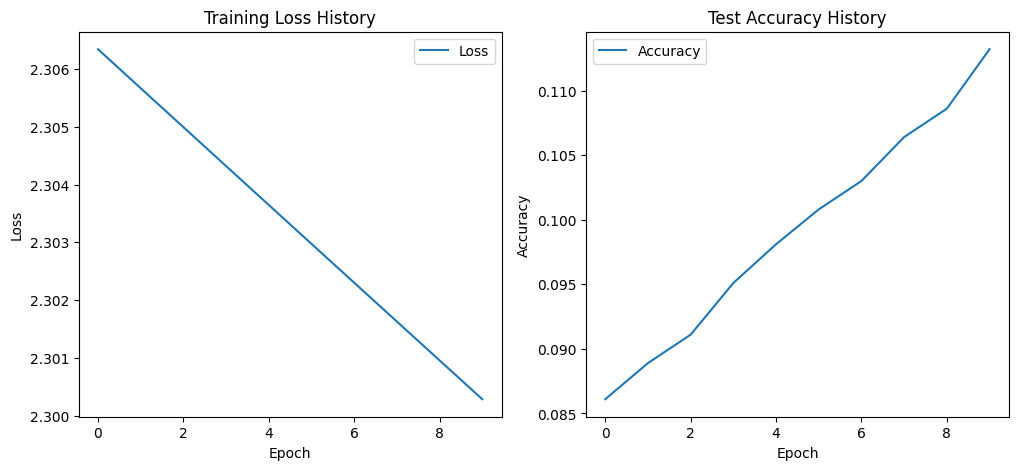

In [12]:
# Plotting loss and accuracy
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(loss_history, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss History')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracy_history, label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Test Accuracy History')
plt.legend()

plt.show()